In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
dataset = pd.read_csv("dataset/adult.data.txt", header=None, na_values='?', sep=",\s+", engine='python')
dataset.columns = [
    "age", "work_class", "fn_weight", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_weekly", "native_country", "income_class"
]

# Remove rows with missing values
dataset.dropna(inplace=True)

# Split the data into two separate DataFrames based on the 'income_class' column
lower_income = dataset[dataset["income_class"] == "<=50K"]
higher_income = dataset[dataset["income_class"] == ">50K"]

# Calculate and print counts
print(f"Count(Above 50K) = {len(higher_income)}")
print(f"Count(Below 50K) = {len(lower_income)}")

# Display the first few rows of the original DataFrame as a check
dataset.head()

Count(Above 50K) = 7508
Count(Below 50K) = 22654


,age,work_class,fn_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_weekly,native_country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
def analyze_numeric(column):
    print(f"Analysis of {column}")
    print("Mean")
    print("Above 50K = ", dataset[dataset["income_class"] == ">50K"][column].mean())
    print("Below 50K = ", dataset[dataset["income_class"] == "<=50K"][column].mean())
    print("\nMedian")
    print("Above 50K = ", dataset[dataset["income_class"] == ">50K"][column].median())
    print("Below 50K = ", dataset[dataset["income_class"] == "<=50K"][column].median())
    print("\nStandard Deviation")
    print("Above 50K = ", dataset[dataset["income_class"] == ">50K"][column].std())
    print("Below 50K = ", dataset[dataset["income_class"] == "<=50K"][column].std())

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    data_above = dataset[dataset["income_class"] == ">50K"][column]
    data_below = dataset[dataset["income_class"] == "<=50K"][column]

    axes[0, 0].boxplot(data_above)
    axes[0, 1].boxplot(data_below)
    axes[1, 0].hist(data_above, bins=20, edgecolor='k')
    axes[1, 1].hist(data_below, bins=20, edgecolor='k')

    for ax, income_bracket in zip(axes.flatten(), [">50K", "<=50K"]):
        ax.set_title(f"{income_bracket} - {column}")
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [4]:
def analyze_categorical(column, data, title):
    category_counts = Counter(data[column])
    sizes = category_counts.values()
    labels = category_counts.keys()
    total = sum(sizes)
    legend_labels = ['{0} - {1:1.2f}%'.format(i, (j/total)*100) for i, j in zip(labels, sizes)]
    
    fig, ax = plt.subplots()
    wedges, _ = ax.pie(sizes)
    ax.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title(title)
    plt.show()

def analyze_by_value(column):
    unique_vals = dataset[column].unique()
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=len(unique_vals), figsize=(5,5 * len(unique_vals)))

    for i, value in enumerate(unique_vals):
        filtered_data = dataset[dataset[column] == value]
        income_above = filtered_data[filtered_data["income_class"] == ">50K"]
        income_below = filtered_data[filtered_data["income_class"] == "<=50K"]
        wedges, texts, autotexts = axes[i].pie([len(income_below.index), len(income_above.index)], autopct='%1.0f%%')
        axes[i].legend(wedges, ["<=50K (Count-" + str(len(income_below.index)) + ")", ">50K (Count-" + str(len(income_above.index)) + ")"], title="Income Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        axes[i].set_title(value)
    
    plt.show()

Analysis of capital_gain
Mean
Above 50K =  3937.6798082045816
Below 50K =  148.8938377328507

Median
Above 50K =  0.0
Below 50K =  0.0

Standard Deviation
Above 50K =  14386.060018977498
Below 50K =  936.3922795494578


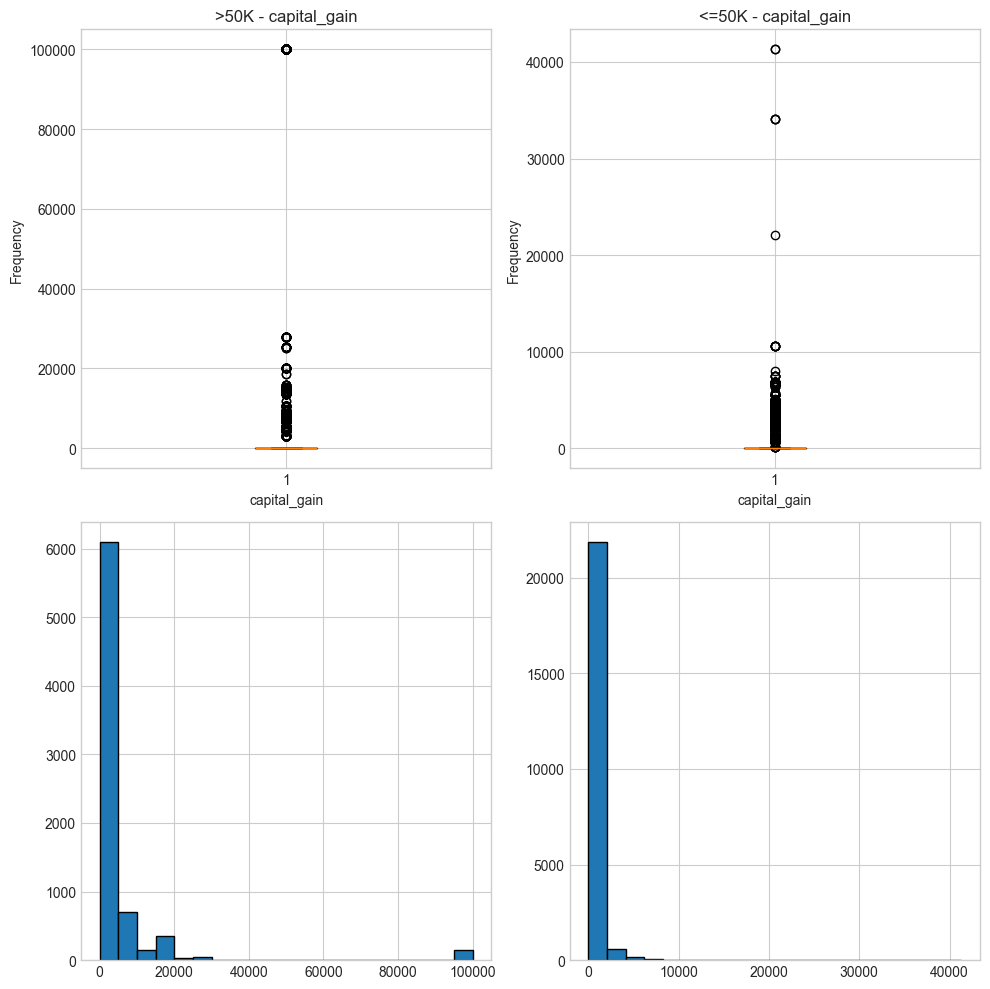

In [5]:
analyze_numeric("capital_gain")

Analysis of hours_weekly
Mean
Above 50K =  45.70657964837507
Below 50K =  39.34859186015715

Median
Above 50K =  40.0
Below 50K =  40.0

Standard Deviation
Above 50K =  10.73698663369796
Below 50K =  11.950774138932152


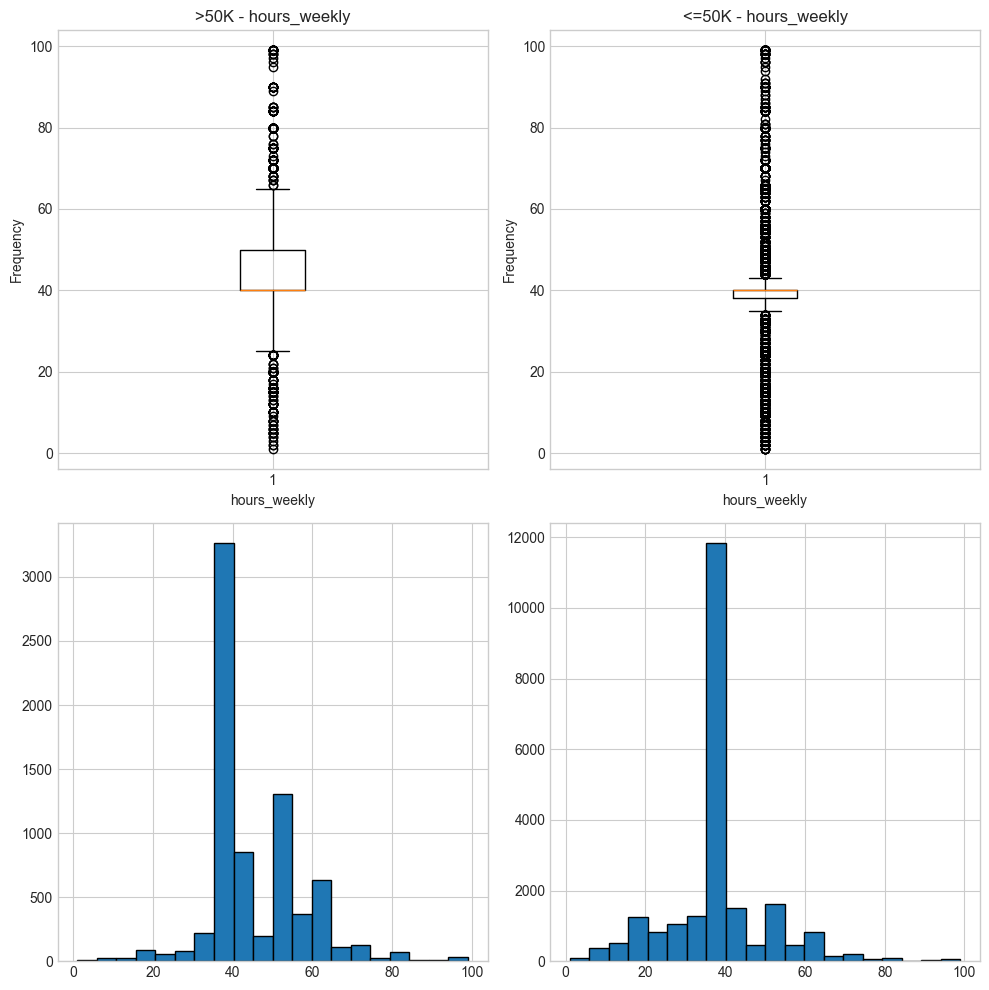

In [6]:
analyze_numeric("hours_weekly")

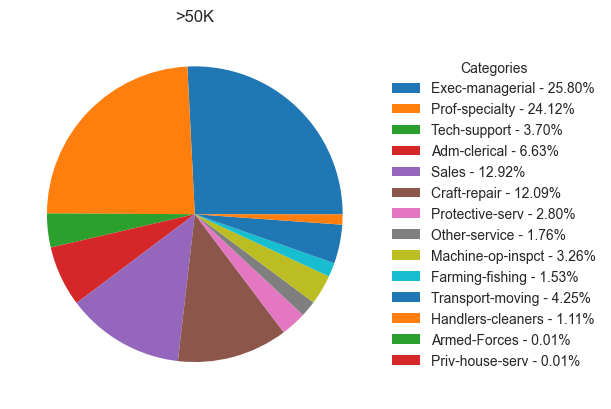

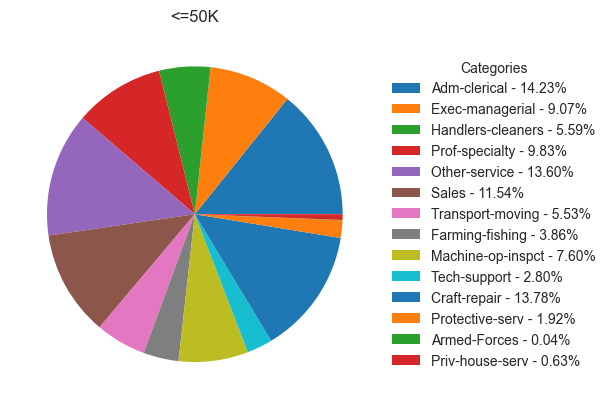

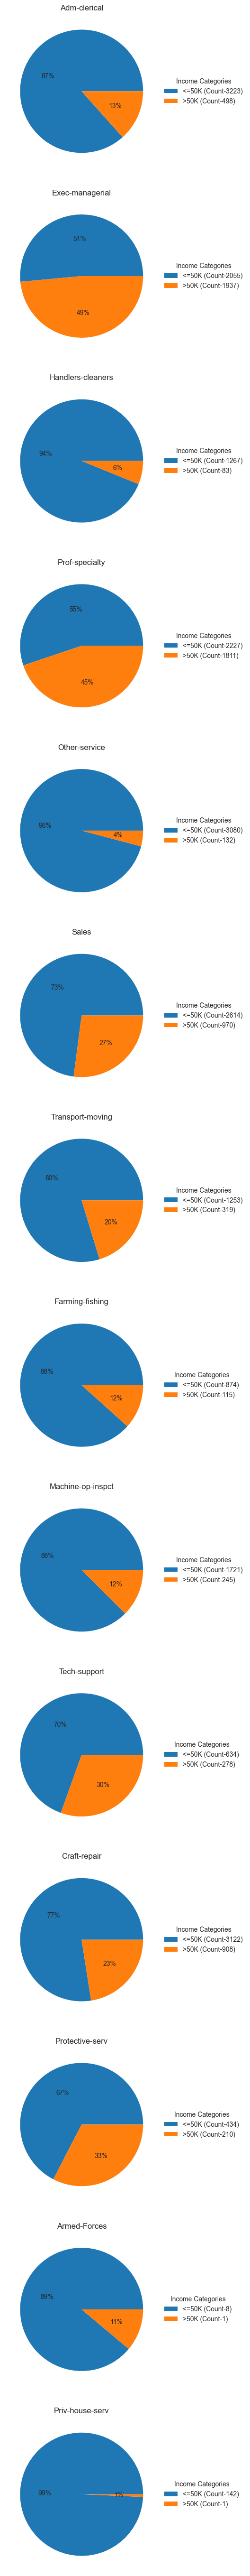

In [7]:
analyze_categorical("occupation", higher_income, ">50K")
analyze_categorical("occupation", lower_income, "<=50K")
print()
print()
analyze_by_value("occupation")

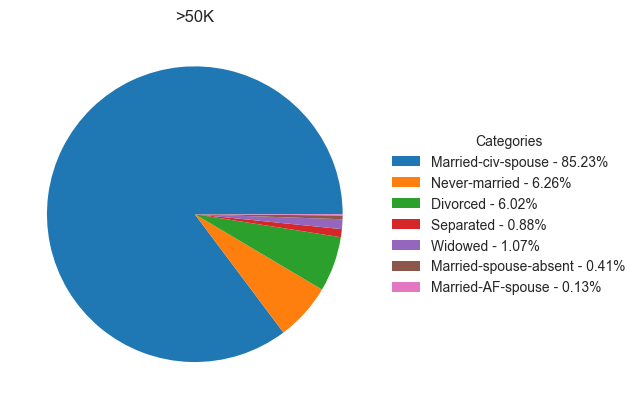

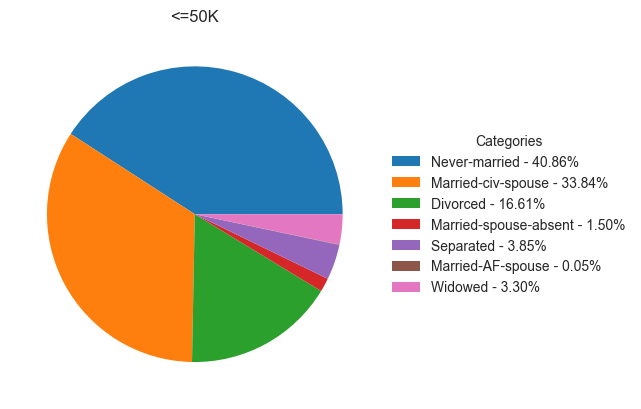

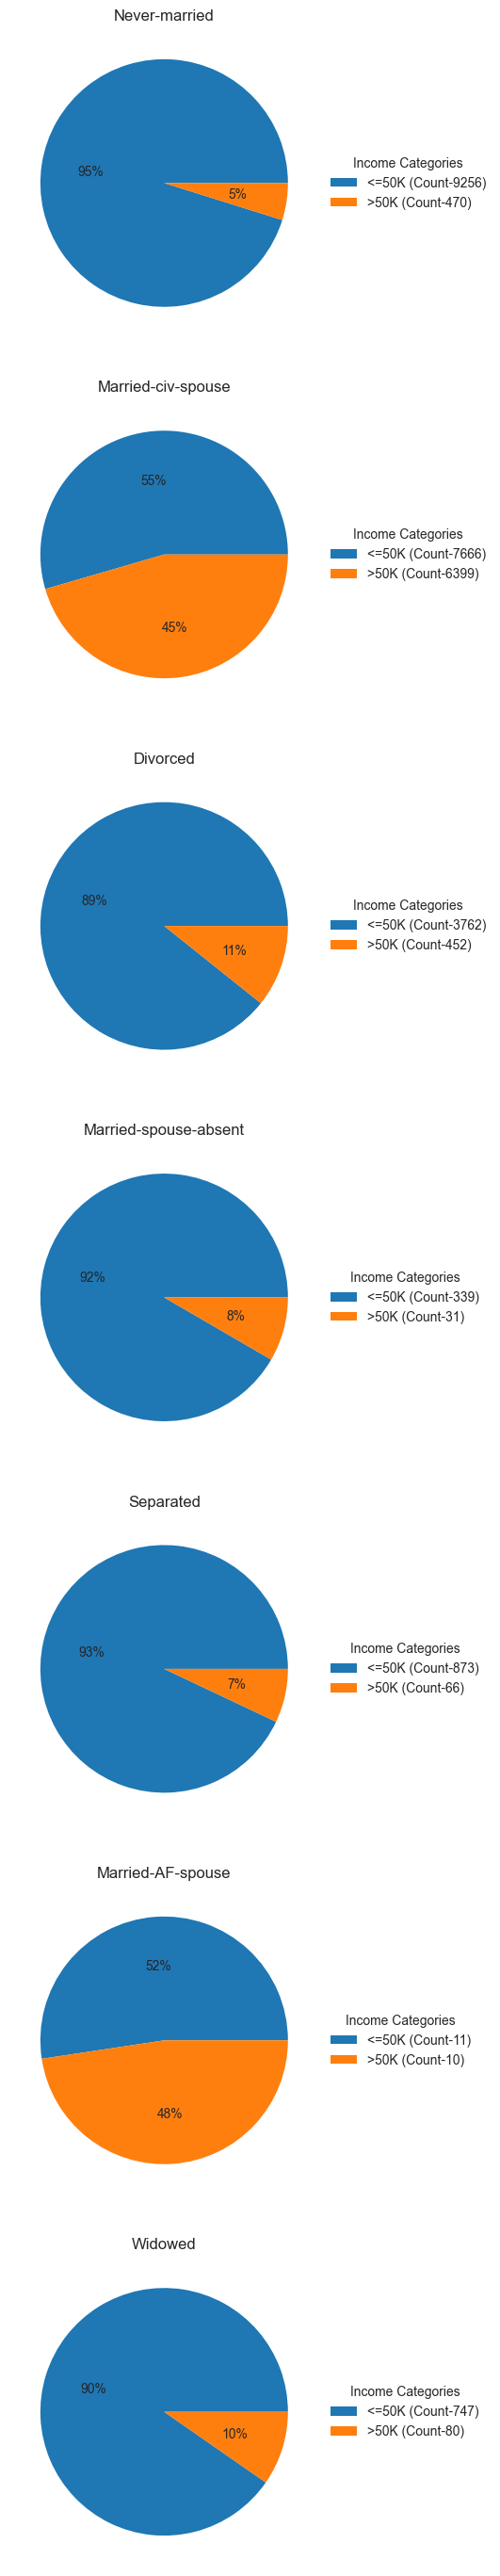

In [8]:
analyze_categorical("marital_status", higher_income, ">50K")
analyze_categorical("marital_status", lower_income, "<=50K")
print()
print()
analyze_by_value("marital_status")

Analysis of education_num
Mean
Above 50K =  11.606419818859882
Below 50K =  9.629116270857244

Median
Above 50K =  12.0
Below 50K =  9.0

Standard Deviation
Above 50K =  2.3684229513551958
Below 50K =  2.4135961332482436


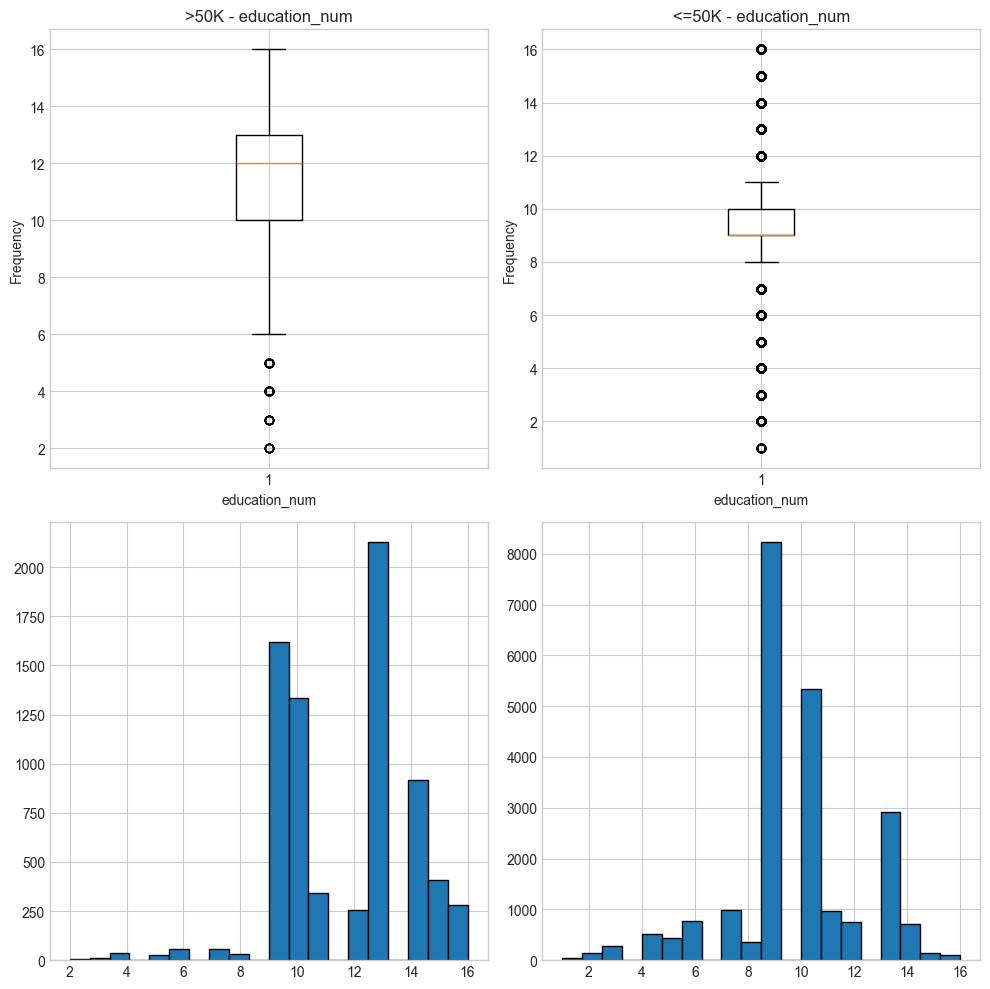

In [9]:
analyze_numeric("education_num")

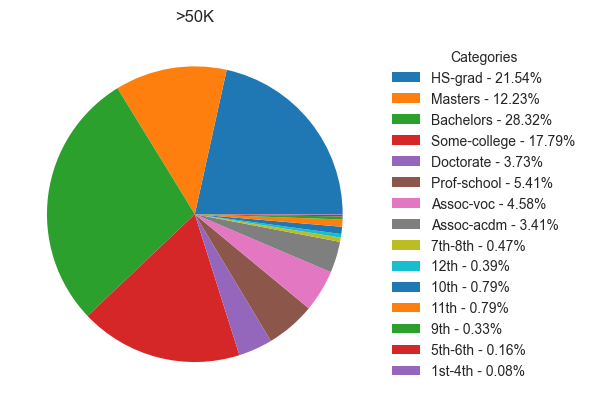

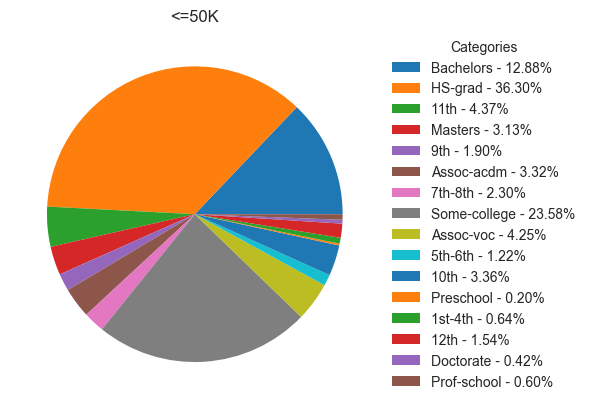

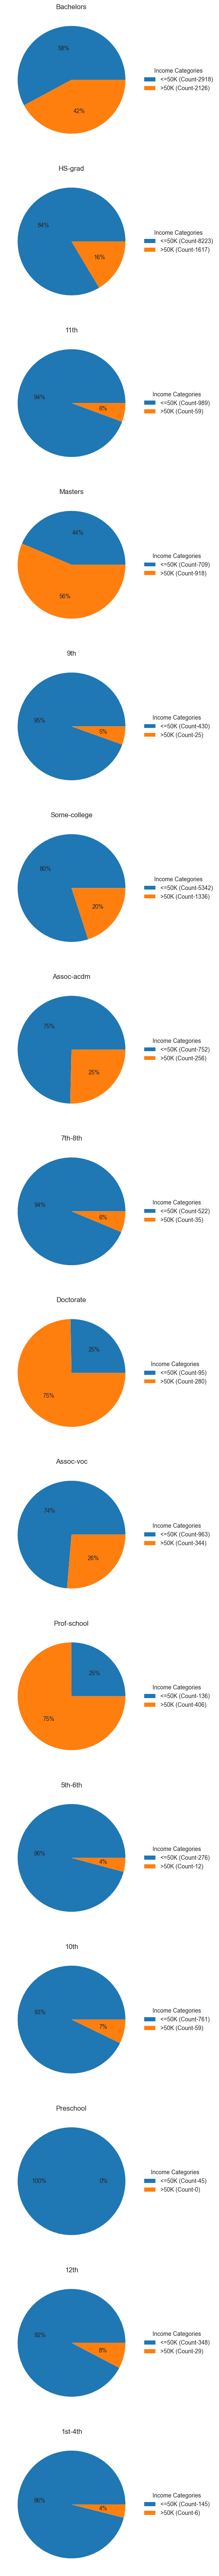

In [10]:
analyze_categorical("education", higher_income, ">50K")
analyze_categorical("education", lower_income, "<=50K")
print()
print()
analyze_by_value("education")

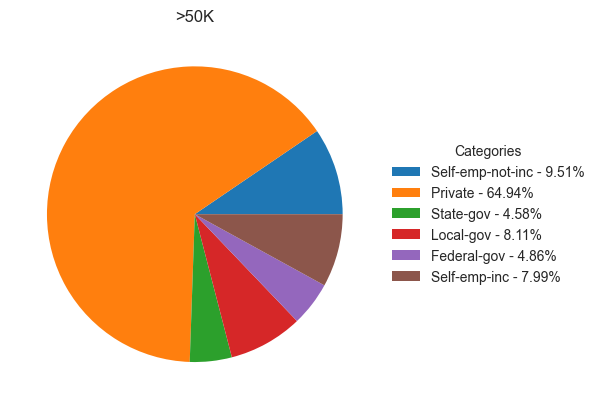

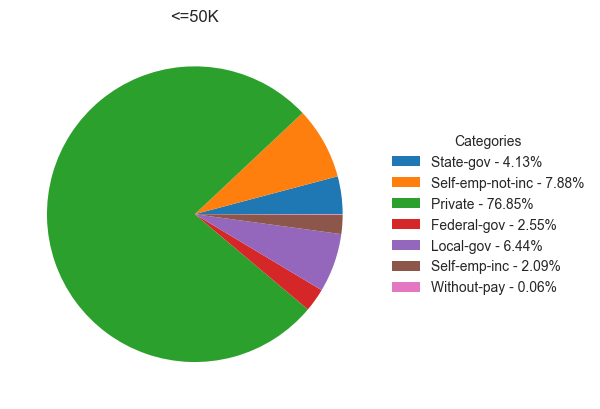

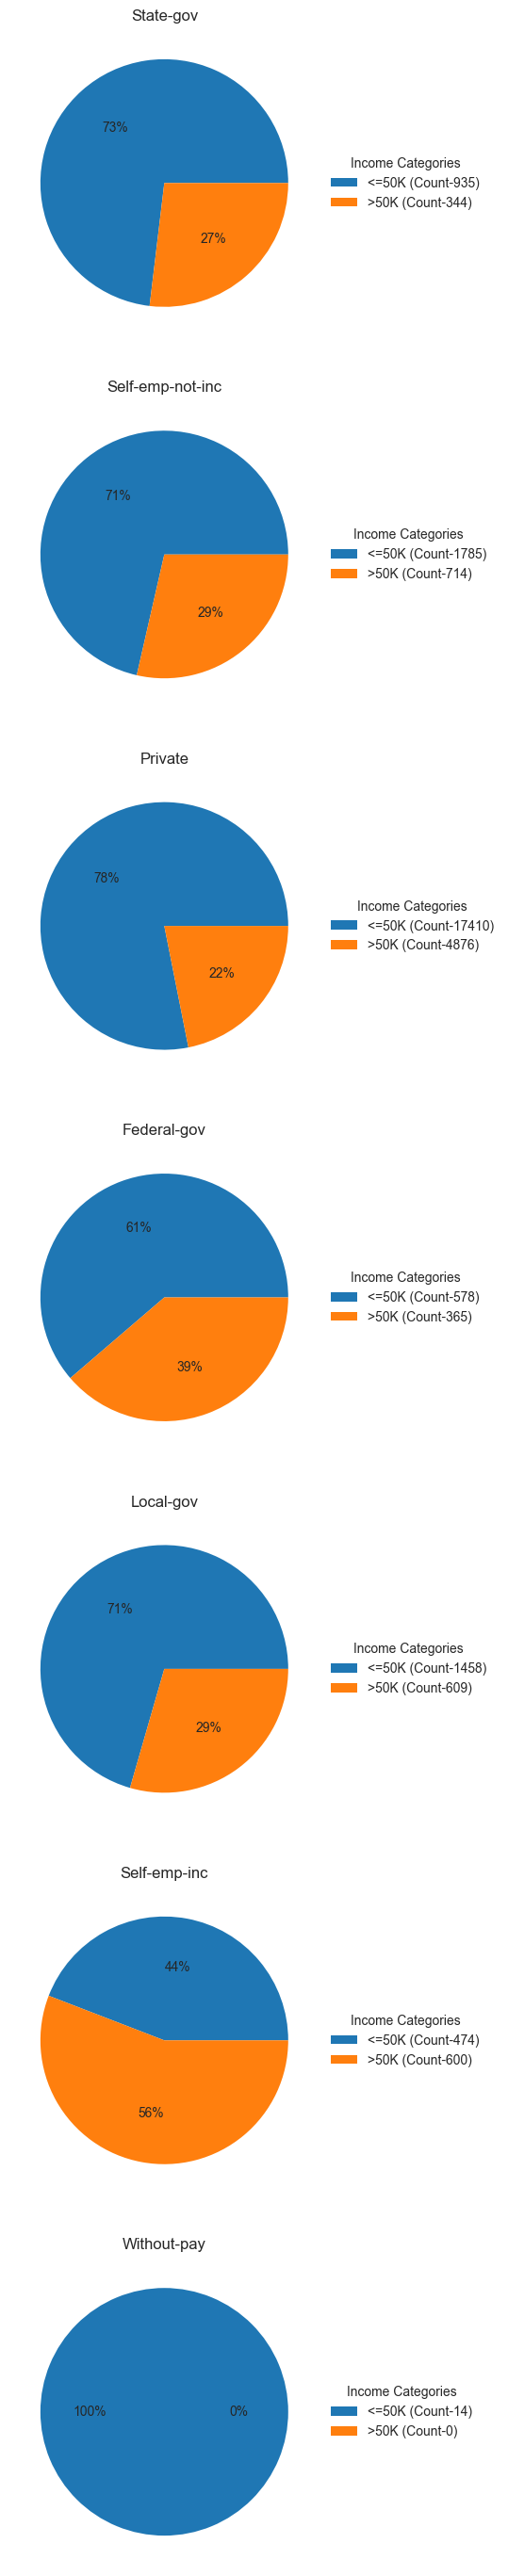

In [11]:
analyze_categorical("work_class", higher_income, ">50K")
analyze_categorical("work_class", lower_income, "<=50K")
print()
print()
analyze_by_value("work_class")

Analysis of age
Mean
Above 50K =  43.95911028236548
Below 50K =  36.60806038668668

Median
Above 50K =  43.0
Below 50K =  34.0

Standard Deviation
Above 50K =  10.269632835673852
Below 50K =  13.464631257161633


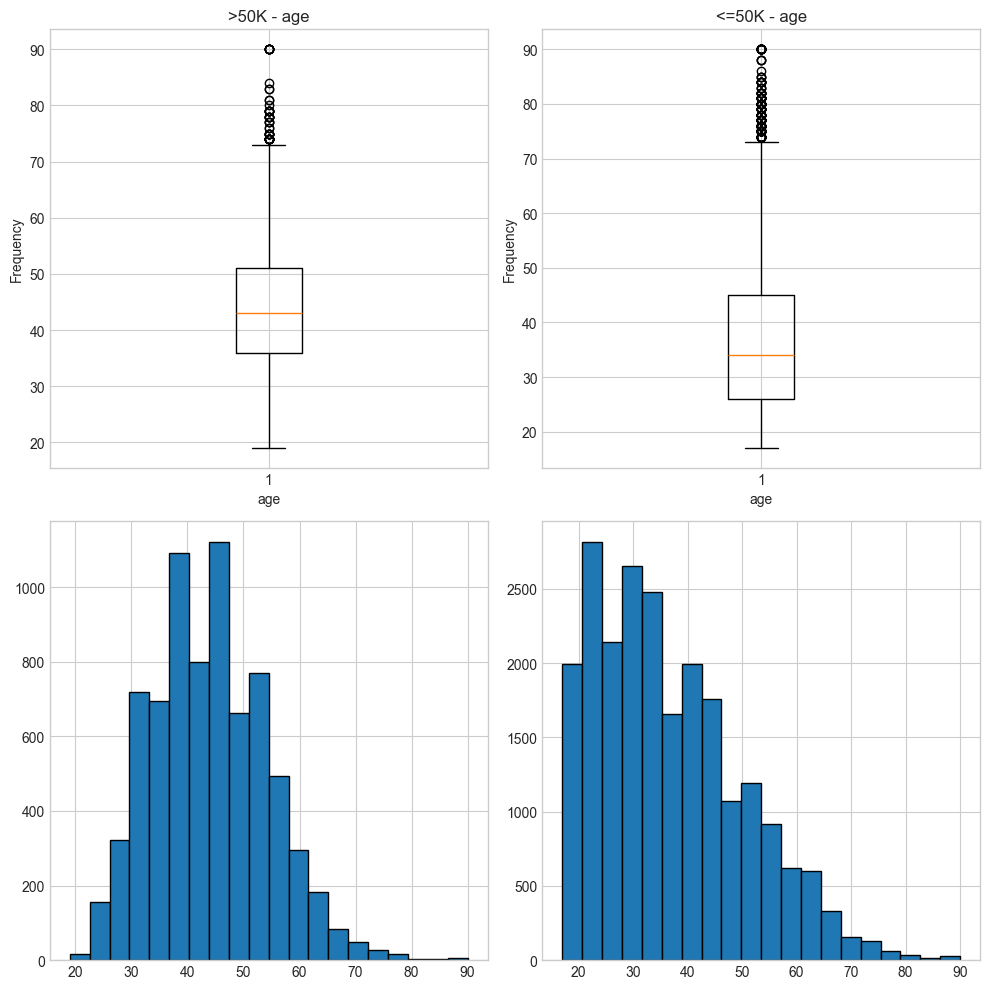

In [12]:
analyze_numeric("age")